In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
# Actual data downloaded from 
#https://www.kaggle.com/datasets/majidarif17/weight-and-height.csv
# https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
#height in inches and weight in pounds

data = pd.read_csv('./input_data/weight-height.csv')
print(data.head())
print(data.shape)
print(data.columns)

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801
(10000, 3)
Index(['Gender', 'Height', 'Weight'], dtype='object')


In [3]:
# Convert inches to centimeters
data["Height(cm)"] = data["Height"]*2.54

# Get summary statistics of Heights in centimeters
display(data['Height(cm)'].describe())

data["Weight(kg)"] = data["Weight"]*0.453592
display(data["Weight(kg)"].describe())

count    10000.000000
mean       168.573602
std          9.772721
min        137.828359
25%        161.304276
50%        168.447898
75%        175.702625
max        200.656806
Name: Height(cm), dtype: float64

count    10000.000000
mean        73.228054
std         14.564131
min         29.347460
25%         61.605982
50%         73.124894
75%         84.898599
max        122.465167
Name: Weight(kg), dtype: float64

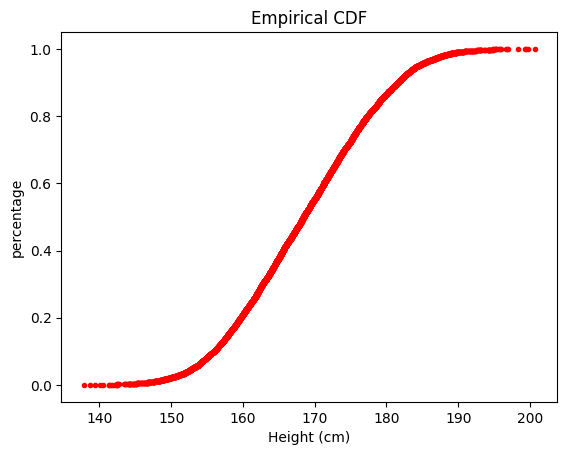

In [5]:
# Create a function to get x, y for of ecdf (emprical cdf)
def get_ecdf(data):
    """Returns x,y for ecdf"""
    # Get lenght of the data into n
    n = len(data)
    
    # We need to sort the data
    x = np.sort(data)
    
    # the function will show us cumulative percentages of corresponding data points
    y = np.arange(1,n+1)/n
    
    return x,y

# Create a function to plot ecdf
def plot_ecdf(data,labelx,labely,title,color):
    """Plot ecdf"""
    # Call get_ecdf function and assign the returning values
    x, y = get_ecdf(data)
    
    plt.plot(x,y,marker='.',linestyle='none',c=color)
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    
    

# Extract 1000 random heights
heights = data['Height(cm)'].sample(1000).reset_index(drop=True)
    
# Plotting Empirical CDF
plot_ecdf(heights,"Height (cm)","percentage","Empirical CDF","r")
plt.show()

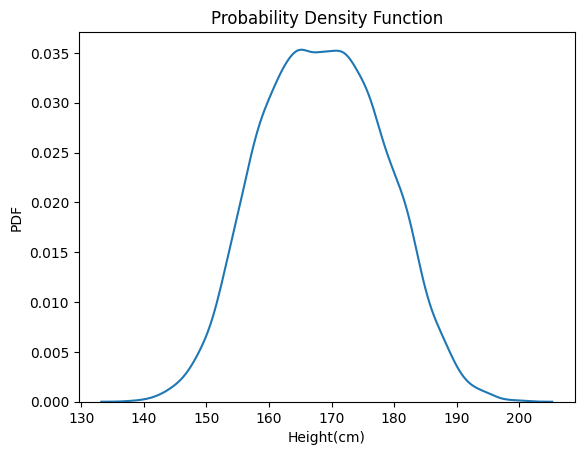

In [11]:
# Plotting PDF
# sns.distplot(heights,hist=False) # distplot deprecated
sns.kdeplot(heights)
plt.xlabel("Height(cm)")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.show()

In [14]:
def draw_bs_replicates(data,func,size):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return bs_replicates

# Draw 15000 bootstrap replicates
bs_replicates_heights = draw_bs_replicates(heights,np.mean,15000)

heights_mean = np.mean(heights)

# Print empirical mean
print("Empirical mean: " + str(heights_mean))

# Print the mean of bootstrap replicates
print("Bootstrap replicates mean: " + str(np.mean(bs_replicates_heights)))

Empirical mean: 168.57360177724598
Bootstrap replicates mean: 168.5728806687221


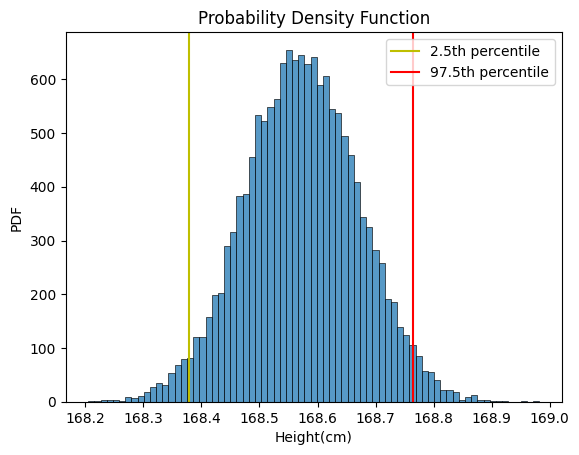

In [19]:
# Plot the PDF for bootstrap replicates as histogram
#plt.hist(bs_replicates_heights,bins=30)
sns.histplot(bs_replicates_heights)

# Showing the related percentiles
plt.axvline(x=np.percentile(bs_replicates_heights,[2.5]), ymin=0, ymax=1,label='2.5th percentile',c='y')
plt.axvline(x=np.percentile(bs_replicates_heights,[97.5]), ymin=0, ymax=1,label='97.5th percentile',c='r')

plt.xlabel("Height(cm)")
plt.ylabel("PDF")
plt.title("Probability Density Function")
plt.legend()
plt.show()

In [20]:
# Get the corresponding values of 2.5th and 97.5th percentiles
conf_interval = np.percentile(bs_replicates_heights,[2.5,97.5])

# Print the interval
print("The confidence interval: ",conf_interval)

The confidence interval:  [168.37815961 168.76502331]
